# Introduction to clustering using KMeans from scratch
Example data from [https://simplemaps.com/data/world-cities](https://simplemaps.com/data/world-cities)

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
cities = pd.read_csv('/Users/flint/Data/cities/worldcities.csv')

In [3]:
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


## Visual map

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mlp

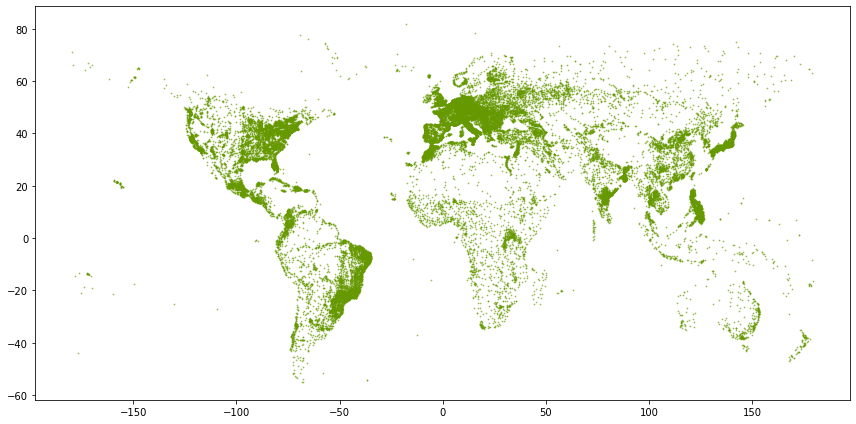

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(cities.lng, cities.lat, s=.5, alpha=0.6, c='#669900')
plt.tight_layout()
plt.show()

## KMeans main steps
1. Init $k$ cluster centroids randomly
2. Allocate data to clusters
3. Evaluate RSS
4. Recompute cluster centroids
5. Repeat until convergence of RSS

In [72]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
import time

In [80]:
def init_centroids(matrix, k):
    centroids = np.zeros((k, matrix.shape[1]))
    for col_i in range(matrix.shape[1]):
        mn, mx = matrix[:,col_i].min(), matrix[:,col_i].max()
        centroids[:,col_i] = np.random.uniform(mn, mx, size=k)
    return centroids

def create_clusters(data, assignment):
    clusters = defaultdict(list)
    for item_id, cluster in enumerate(assignment):
        clusters[cluster].append(data[item_id])
    return dict([(c, np.array(x)) for c, x in clusters.items()])

def update_centroids(clusters, centroids):
    new_centroids = []
    for i in range(centroids.shape[0]):
        try:
            centroid = clusters[i].mean(axis=0)
            new_centroids.append(centroid)
        except KeyError:
            new_centroids.append(centroids[i])
    return np.array(new_centroids)

def rss(clusters):
    rss_value = 0
    for cluster in clusters.values():
        delta = euclidean_distances(cluster, cluster.mean(axis=0).reshape(1, -1))
        rss_value += delta.sum()
    return rss_value
    
def visualize(data, centroids, clusters=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    if clusters is not None:
        color = clusters
    else:
        color = '#669900'
    ax.scatter(data[:,0], data[:,1], s=10, alpha=0.6, c=color, cmap='viridis')
    ax.scatter(centroids[:,0], centroids[:,1], alpha=0.8, edgecolors='#000000', 
               linewidths=2, s=100, c=range(centroids.shape[0]), cmap='viridis')
    plt.tight_layout()
    plt.show()

In [81]:
from IPython.display import clear_output

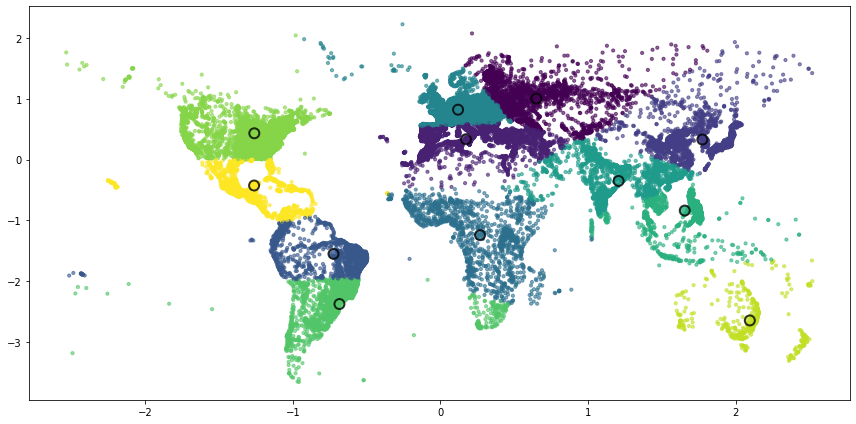

In [91]:
X = StandardScaler().fit_transform(cities[['lng', 'lat']].to_numpy())
k = 12 #len(cities.country.unique())
centroids = init_centroids(X, k)
rss_scores = []

for iteration in range(20):
    delta = euclidean_distances(X, centroids)
    assignment = delta.argmin(axis=1)
    visualize(X, centroids, clusters=assignment)
    clusters = create_clusters(X, assignment)
    rssv = rss(clusters)
    centroids = update_centroids(clusters, centroids)
    rss_scores.append(rssv)
    time.sleep(0.5)
    clear_output(wait=True)

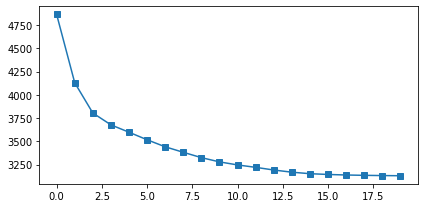

In [90]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(rss_scores, marker='s')
plt.tight_layout()
plt.show()